(13, 13)
[5.69997198e-02 3.19278428e-04 5.44423500e-06 3.54348629e-06
 9.80191905e-07 6.08547467e-07 2.46020098e-07 1.27227018e-07
 6.78842017e-08 3.61427703e-08 2.65115208e-08 9.44082388e-09
 4.85456973e-09]
0.9998064796142907


NameError: name 'row' is not defined

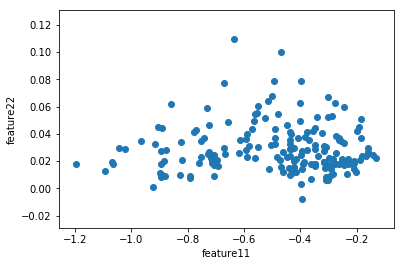

In [4]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math



#calculate the euclidian distance
def euclidian_distance(x,y):
    return(math.sqrt(pow(x[0]-y[0],2)+pow(x[1]-y[1],2)))
           

#determine if a training example is close to cluster1 or cluster2            
def clusters(cluster1,cluster2,final_features,centroid1,centroid2,row):
    for i in range(row):
        dist_c1=euclidian_distance(final_features[i],centroid1)
        dist_c2=euclidian_distance(final_features[i],centroid2)
        if dist_c1 < dist_c2:
            cluster1.append(i)
        else:
            cluster2.append(i)                
            
            
            
#determining the mean centroid
def mean_centroid(cluster1,cluster2,final_features,centroid1,centroid2):
    centroid1=[0,0]
    centroid2=[0,0]
    for i in cluster1:
        centroid1[0]+=final_features[i][0]
        centroid1[1]+=final_features[i][1]
    centroid1[0]=centroid1[0]/len(cluster1)
    centroid1[1]=centroid1[1]/len(cluster1)
    for j in cluster2:
        centroid2[0]+=final_features[j][0]
        centroid2[1]+=final_features[j][1]
    centroid2[0]=centroid2[0]/len(cluster2)
    centroid2[1]=centroid2[1]/len(cluster2)
              
#plotting the clusters
def plot(cluster,final_features):
    X=[]
    Y=[]
    for i in cluster:
        X.append(final_features[i][0])
        Y.append(final_features[i][1])
    plt.scatter(X,Y, marker='o')
    plt.xlabel("feature-1")
    plt.ylabel("feature-2") 

    
#main function    
def main():          
           
    #reading a csv file
    df=pd.read_csv("wine.csv")
    a=[]
    b=[]
    col=len(df.columns)
    row=len(df.index)


    #storing mean and min - max for each column
    for i in range(col-1):
        x=df.loc[i].mean()                 
        y=df.loc[i].max()-df.loc[i].min()
        a.append(x)
        b.append(y)

    m=[]
    lis=np.array(df)


    #mean normalization
    for i in range(row):
        for j in range(col-1):
            z=(lis[i,j]-a[j])/b[j]
            m.append(z)

    m=np.reshape(m,(row,col-1))    


    #dimensionality reduction to 2-d
    pcomp=2

    #covariance matrix
    m=np.transpose(m)
    cov_mat=np.cov(m)
   
    #determining if with k=2 ie. number of principle componets=2 99% variance is retained
    s1=0
    s2=0
    #determining svd
    u,s,v=np.linalg.svd(cov_mat)
    #sum of first pcomp(k) svd values /sum of all svd values
    for i in range(col-1):
        s1+=s[i]
    for i in range(pcomp):
        s2+=s[i]
    #print the value (should be greater than or equal to 0.99)
    print("Variance retained:  ",s2/s1)
    
    #computing n(number of features) eigen vectors
    eigen_values, eigen_vectors= np.linalg.eig(cov_mat)

    #considering only 2(pcomp=2) columns
    eigen_vectors=eigen_vectors[:,:2]
    eigen_vectors=np.transpose(eigen_vectors)

    #computing final features for each training example
    final_features=np.matmul(eigen_vectors,m)
    final_features=np.transpose(final_features)

    #plotting
    X=final_features[:,0]
    Y=final_features[:,1]
    plt.scatter(X,Y, marker='o')
    plt.xlabel("feature11")
    plt.ylabel("feature22")    

    
    #clustering the wines into 2 parts
    pcluster1=[]
    pcluster2=[]
    cluster1=[]
    cluster2=[]

    #sorting the data in ascending order to initialize the centroids
    sorted(final_features, key=lambda x: x[0])
    centroid1=final_features[0].copy()
    centroid2=final_features[-1].copy()

    #finding clusters based on initial centroids
    clusters(pcluster1,pcluster2,final_features,centroid1,centroid2,row)           
    mean_centroid(pcluster1,pcluster2,final_features,centroid1,centroid2)
    
    
    i=1
    #repeat until there are no more changes in the cluster(find cluster and then find the mean centroid)
    while i!=0:
        cluster1.clear()
        cluster2.clear()
        clusters(cluster1,cluster2,final_features,centroid1,centroid2,row)
        cluster1.sort()
        pcluster1.sort()
        if cluster1==pcluster1:
               break
        else:
               pcluster1=cluster1.copy()
               pcluster2=cluster2.copy()
        mean_centroid(cluster1,cluster2,final_features,centroid1,centroid2)

    #printing the clusters
    print("\nType1 wine:\n",cluster1)
    print("\nType2 wine:\n",cluster2)
    
    #plotting the clusters
    plot(cluster1,final_features)
    plot(cluster2,final_features) 
           
           
if __name__ =='__main__':
    main() 
